# Moving from West Bridgford (UK) to Zurich (Switzerland)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Results and Discussion](#results)
5. [Conclusion](#conclusion)
6. [References](#references)

# 1. Introduction: Business Problem <a name="introduction"></a>

## 1.1. Background

West Bridgford is a town in the Rushcliffe borough of Nottinghamshire, England, immediately south of the city of Nottingham, from which it is divided by the River Trent. <br>

We have lived in West Bridgford for 3 years. Our house was near the River Trent and Bridgford Park. There were several coffee shops, good restaurants, grocery markets and pharmacies nearby. House prices were not as high as the city center of Nottingham, but it was possible to find everything that we need in the neighborhood. <br>
Long story short, we loved the town that we lived in the UK, but one day we decided to move to Zurich for some reason.<br>

The canton of Zürich is a Swiss canton in the northeastern part of the country. Zürich is the largest city in Switzerland and the capital of the canton of Zürich. In 2019 Zürich was ranked among the ten most liveable cities in the world by **<a href='mobilityexchange.mercer.com/Insights/quality-of-living-rankings'>Mercer</a>** [1]. But it is known that, it can also be listed in most expensive cities, among the house renting or buying prices, in the world.

## 1.2. Business Problem

In this project, we decided to find a city in Zurich Canton to live in, which is similar to West Bridgford. Specifically, this report will be targeted to stakeholders who will move from one city to another and want to compare the advantages and disadvantages while deciding on the city to move in. 

There are 3 main critera while choosing the city to live in:
1. It needs to be close to the city center.
2. It needs to be similar to West Bridgford.
3. It needs to be affordable in terms of housing prices

To solve this business problem, we are going to merge the data of Zurich neighborhoods with West Bridgford. In order to find similar neighborhoods, we will use k-means clustering algorithm and we will examine the cluster which includes West Bridgford.

# 2. Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* distance of neighborhood from city center
* renting prices
* similarities and dissimilarities when it's compared to West Bridgford in terms of venues

Following data sources will be needed to extract/generate the required information:
* latitudes and longitudes of the neighborhoods will be used to calculate the distance from the city center (max distance will be considered as 12 km from the city center). This data is obtained using **<a href='https://www.geonames.org/postal-codes/CH/ZH/zurich.html'>Zurich - postal codes<a/>** [2].
* average renting prices will be used to eliminate the places which have higher renting prices. This data is obtained using **<a href='https://www.immomapper.ch/en/real-estate-market/'>Real Estate Market</a>** [3].
* venues in the neighborhoods will be used to cluster the neighborhoods according to their similarities/dissimilarities. This data is obtained using **<a href='https://developer.foursquare.com/'>Foursquare API</a>** [4].

# 3. Methodology <a name="methodology"></a>

In this project, we will direct our efforts on finding similar places to West Bridgford, which are also close to the city center of Zurich and have affordable renting prices.

Methodology section is consists of two sub-sections:

<u>1. Data Preparation</u><br>

In first step, we collected the data which includes the latitudes and longitudes of all the cities in Zurich Canton and also West Bridgford. Then, we eliminated the ones in Zurich Canton which have longer distance than 12 km to Zurich city center, since our area of interest is 12x12 km around Zurich city center. This way, our number of candidates have been decreased to 51 from 172.

Then, we collected the data which includes the average annual renting prices per $m^2$ in all our 51 places. After collecting this data, we made some assumptions as we have decided  to rent an apartment which is at least 80 $m^2$ and which costs at most CHF 2000 per month. Accordingly, we calculated the monthly average renting prices per 80 $m^2$ and eliminated the ones which costs more than CHF 2000. This way, our number of candidates have been decreased to 37 from 51.

After creating a dataframe with all the latitude and longitude values for these 37 places (total of 38 places including West Bridgford), we have collected the data of nearby venues using **<a href='https://developer.foursquare.com/'>Foursquare API</a>** [4]. We had 256 venues and 94 unique venue categories. Using this data, we created a dataframe which stores the number of venues in each venue category for every candidate place.

<u>2. Clustering </u><br>

After we had our data prepared, we used a clustering algorithm in order to divide our places into clusters. The aim was finding that one cluster which also includes West Bridgford. We can claim that all the other places in this cluster are similar to West Bridgford and all the places in other clusters are dissimilar to West Bridgford. In order to decide on similarity/dissimilarity, we looked at the venues in the candidate places. With finding our cluster, we decreased our candidate places to 16.

## 3.1. Data Preparation

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import geopy
from geopy import distance
import folium
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans

### 3.1.1. Latitudes and Longitudes

In this section, we collected the data which includes the latitudes and longitudes of all the cities in Zurich Canton and also West Bridgford. Then, we eliminated the ones in Zurich Canton which have longer distance than 12 km to Zurich city center, since our area of interest is 12x12 km around Zurich city center. This way, our number of candidates have been decreased to 51 from 172.

##### Data Collection

We will now download our data to create a dataframe which contains the latitude & longitude coordinates of our candidate neighborhoods. Our area of interest is aprox. 12x12 killometers centered around Zurich city center.

In [2]:
# Download data and store the html content in soup 
website_url = requests.get('https://www.geonames.org/postal-codes/CH/ZH/zurich.html')
soup = BeautifulSoup(website_url.content,'html')

In [3]:
# find the table in html and find all columns in the table to reach the data in the columns
My_table = soup.find('table',{'class':'restable'})
values = My_table.findAll('td')[:-1]

In [4]:
# store place, latitude and longitude values in lists
Place = []
Latitude = []
Longitude = []  

mean_lat = 0
mean_lon = 0

val_count = int(len(values))
for i in range(0, val_count, 9):
    if(values[i+1].text not in Place):
        Place.append(values[i+1].text)
        lat = values[i+8].text[3:].split('/')[0]
        lon = values[i+8].text[3:].split('/')[1]
        mean_lat += float(lat)
        mean_lon += float(lon)
        Latitude.append(lat)
        Longitude.append(lon)

##### Understanding the data

In [5]:
# Store values in dataframe named df_zurich
df_zurich = pd.DataFrame()
df_zurich['Place'] = Place
df_zurich['Latitude'] = Latitude
df_zurich['Longitude'] = Longitude
df_zurich.head()

,Place,Latitude,Longitude
0,Zürich,47.367,8.55
1,Regensdorf,47.434,8.469
2,Adliswil,47.31,8.525
3,Glattbrugg,47.431,8.563
4,Rümlang,47.45,8.53


In [6]:
df_zurich.dtypes

Place        object
Latitude     object
Longitude    object
dtype: object

##### Data preprocessing

In [7]:
# Changing the data types of columns Latitude and Longitude from object to float
df_zurich['Latitude'] = df_zurich.Latitude.astype(float)
df_zurich['Longitude'] = df_zurich.Longitude.astype(float)
df_zurich.dtypes

Place         object
Latitude     float64
Longitude    float64
dtype: object

Removing the candidates which have longer distance than 12km from Zurich city center

In [8]:
# Find the distance between Zurich city center and other places
distance = []
for i in range (0,df_zurich.shape[0]):
    distance.append(geopy.distance.vincenty((47.367,8.55), (df_zurich['Latitude'][i],df_zurich['Longitude'][i])).km)
    
df_zurich['Distance'] = distance
place_count = df_zurich.shape[0]
print('Place Count:', place_count)
df_zurich.head()

Place Count: 172


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


,Place,Latitude,Longitude,Distance
0,Zürich,47.367,8.550,0.000000
1,Regensdorf,47.434,8.469,9.637033
2,Adliswil,47.310,8.525,6.612767
3,Glattbrugg,47.431,8.563,7.182785
4,Rümlang,47.450,8.530,9.350487


In [9]:
# Select only the places which are in our area of interest (radius of 12 km.)
df_zurich = df_zurich.loc[(df_zurich['Distance'] < 12)]
df_zurich = df_zurich.drop(['Distance'], axis=1)
df_zurich.reset_index(drop=True,inplace=True)
place_count = df_zurich.shape[0]
print('Place Count:', place_count)
df_zurich.head()

Place Count: 51


,Place,Latitude,Longitude
0,Zürich,47.367,8.550
1,Regensdorf,47.434,8.469
2,Adliswil,47.310,8.525
3,Glattbrugg,47.431,8.563
4,Rümlang,47.450,8.530


### 3.1.2. Average Rent Prices

In this section, we collected the data which includes the average annual renting prices per $m^2$ in all our 51 places. After collecting this data, we made some assumptions as we have decided  to rent an apartment which is at least 80 $m^2$ and which costs at most CHF 2000 per month. Accordingly, we calculated the monthly average renting prices per 80 $m^2$ and eliminated the ones which costs more than CHF 2000. This way, our number of candidates have been decreased to 37 from 51.

##### Data Collection

It was difficult to find the average renting prices for all of our candidate places. So instead of reading them from just one website, we used more than one website to generate a csv file. We used this csv file to calculate average monthly rent prices and eliminate the ones which are higher than CHF 2000 for a minimum of 80 $m^2$ house.

In [10]:
#Read csv file named 'rent.csv'
rents = pd.read_csv('rent.csv')
rents.head()

,Place,Rent/m2
0,Adliswil,305.0
1,Aeugst am Albis,280.0
2,Bassersdorf,279.0
3,Benglen,276.0
4,Binz,275.0


##### Data preprocessing

Removing the candidates which have higher monthly rent than CHF 2000

In [11]:
# Calculate the monthly rent per a 80m2 apartment and add the values in a new column named 'Monthly Rent (80m2)'
rents['Monthly Rent (80m2)'] = rents['Rent/m2']*80/12
rents.sort_values(['Rent/m2']).tail()

,Place,Rent/m2,Monthly Rent (80m2)
48,Zollikon,376.0,2506.666667
33,Rüschlikon,381.0,2540.000000
21,Kilchberg ZH,389.0,2593.333333
50,Zürich,409.0,2726.666667
17,Gockhausen,NaN,NaN


In [12]:
# Remove the places which have a higher average monthly renting price than CHF 2000 for an 80m2 apartment
rents = rents[rents['Monthly Rent (80m2)']<=2000]
rents.sort_values(['Rent/m2']).tail()

,Place,Rent/m2,Monthly Rent (80m2)
29,Opfikon,286.0,1906.666667
22,Kloten,287.0,1913.333333
5,Birmensdorf ZH,288.0,1920.000000
11,Dübendorf,293.0,1953.333333
15,Gattikon,300.0,2000.000000


In [13]:
# Merge the Latitude&Longitudes data with rent data
df_zurich = pd.merge(df_zurich, rents, how='right', on='Place')
place_count = df_zurich.shape[0]
df_zurich.head()

,Place,Latitude,Longitude,Rent/m2,Monthly Rent (80m2)
0,Regensdorf,47.434,8.469,264.0,1760.000000
1,Glattbrugg,47.431,8.563,236.0,1573.333333
2,Rümlang,47.450,8.530,263.0,1753.333333
3,Kloten,47.452,8.585,287.0,1913.333333
4,Bassersdorf,47.443,8.629,279.0,1860.000000


In [14]:
#Since we find the relevant rows, we can now drop the rent column
df_zurich = df_zurich.drop('Rent/m2',1).drop('Monthly Rent (80m2)',1)
print('Place Count:', place_count)
df_zurich.tail()

Place Count: 37


,Place,Latitude,Longitude
32,Gattikon,47.284,8.548
33,Stallikon,47.326,8.490
34,Oberhasli,47.466,8.499
35,Birmensdorf ZH,47.355,8.443
36,Aeugst am Albis,47.275,8.490


Adding West Bridgford latitude and longitude into the dataframe as a new row

In [15]:
#Finally, we add our ex-house latitude and longitude in the dataframe
df = df_zurich.append({'Place':'West Bridgford',
                  'Latitude': 52.92979,
                 'Longitude': -1.12537}, 
                 ignore_index=True)
df

,Place,Latitude,Longitude
0,Regensdorf,47.43400,8.46900
1,Glattbrugg,47.43100,8.56300
2,Rümlang,47.45000,8.53000
3,Kloten,47.45200,8.58500
4,Bassersdorf,47.44300,8.62900
5,Wallisellen,47.41500,8.59700
6,Dietlikon,47.41800,8.61900
7,Dübendorf,47.39700,8.61900
8,Schwerzenbach,47.38200,8.65700
9,Volketswil,47.39000,8.69100


##### Data Visualization

In [16]:
# Create a folium map of West Bridgford
location_wb = [52.92979, -1.12537]
map_wb = folium.Map(location=location_wb, zoom_start = 12)
label = 'West Bridgford'
label = folium.Popup(label, parse_html=True)
# add markers to map
circles = folium.CircleMarker(
    location_wb,
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_wb) 

In [17]:
# Create a folium map of Zurich
location_zurich = [47.367,8.55]
map_zurich = folium.Map(location=location_zurich, zoom_start = 10)
# add markers to map
for lat, lng, place in zip(df['Latitude'], df['Longitude'], df['Place']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    circles = folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich) 

In [18]:
# display maps with place markers (West Bridgford on the left and Zurich on the right)

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_wb.get_root().render().replace('"', '&quot;'),500,500,
                   map_zurich.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### 3.1.3. Nearby Venues

In this section, using the dataframe with all the latitude and longitude values from the previous section, we have collected the data of nearby venues using **<a href='https://developer.foursquare.com/'>Foursquare API</a>** [4]. We had 130 unique venue categories. Using this data, we created a dataframe which stores the number of venues in each venue category for every candidate place.

##### Data Collection

In [19]:
# Client Information for Foursquare API
CLIENT_ID = 'BFCUWGV5X43KYPSDEWIRTMDU5S10B22JAI5MJRCDWVYNZUKG' # your Foursquare ID
CLIENT_SECRET = 'JK11TA5KMW2RBUZ1XMDDH51IAHBO2HOQKLIUS3XQQTLDSWZX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BFCUWGV5X43KYPSDEWIRTMDU5S10B22JAI5MJRCDWVYNZUKG
CLIENT_SECRET:JK11TA5KMW2RBUZ1XMDDH51IAHBO2HOQKLIUS3XQQTLDSWZX


In [20]:
# Create a function to create the GET request URL and send the GET request to examine the resutls for all the neighborhoods in Zurich Canton, plus West Bridgford
def getNearbyVenues(names, latitudes, longitudes, radius=500): 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Place', 
                  'Place Latitude', 
                  'Place Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# Run the above function on each place and create a new dataframe called venues.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

venues = getNearbyVenues(names=df['Place'], latitudes=df['Latitude'], longitudes=df['Longitude'])

##### Understanding the data

In [22]:
# Print the size of the resulting dataframe
print('Shape', venues.shape)
venues

Shape (288, 7)


,Place,Place Latitude,Place Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regensdorf,47.43400,8.46900,Thai Playa,47.434900,8.471354,Thai Restaurant
1,Regensdorf,47.43400,8.46900,Mövenpick Hotel Zürich-Regensdorf,47.431334,8.467797,Hotel
2,Regensdorf,47.43400,8.46900,Fitnesspark Regensdorf,47.430683,8.469147,Gym / Fitness Center
3,Regensdorf,47.43400,8.46900,Coop,47.430948,8.467511,Supermarket
4,Regensdorf,47.43400,8.46900,Zentrum Regensdorf,47.431084,8.469701,Shopping Mall
...,...,...,...,...,...,...,...
283,West Bridgford,52.92979,-1.12537,The Fruit Basket,52.930582,-1.125506,Health Food Store
284,West Bridgford,52.92979,-1.12537,Vision Express Opticians - Nottingham - West B...,52.931550,-1.126504,Optical Shop
285,West Bridgford,52.92979,-1.12537,Cured,52.931648,-1.126285,Deli / Bodega
286,West Bridgford,52.92979,-1.12537,West End Restuarant & Cabaret,52.932263,-1.127252,Music Venue


In [23]:
# Print how many venues were returned for each neighborhood
venues.groupby('Place').count()

,Place Latitude,Place Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Place,,,,,,
Aeugst am Albis,1,1,1,1,1,1
Bassersdorf,7,7,7,7,7,7
Benglen,3,3,3,3,3,3
Binz,3,3,3,3,3,3
Birmensdorf ZH,6,6,6,6,6,6
Bonstetten,3,3,3,3,3,3
Brüttisellen,8,8,8,8,8,8
Dietikon,15,15,15,15,15,15
Dietlikon,14,14,14,14,14,14


In [24]:
print('There are {} uniques venues.'.format(len(venues['Venue'].unique())))

There are 256 uniques venues.


In [25]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 94 uniques categories.


##### Data preprocessing

In [26]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add place column back to dataframe
onehot['Place'] = venues['Place'] 

# move place column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

print(onehot.shape)
onehot.head()

(288, 95)


,Place,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,...,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theme Restaurant,Train Station,Tram Station,Wine Bar,Zoo Exhibit
0,Regensdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Regensdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Regensdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Regensdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Regensdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Group rows by place and by taking the mean of the frequency of occurrence of each category
onehot_grouped = onehot.groupby('Place').mean().reset_index()
print(onehot_grouped.shape)
onehot_grouped.tail()

(36, 95)


,Place,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,...,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theme Restaurant,Train Station,Tram Station,Wine Bar,Zoo Exhibit
31,Urdorf,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125
32,Volketswil,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000
33,Wallisellen,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.000
34,Weiningen ZH,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000
35,West Bridgford,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,...,0.000000,0.037037,0.037037,0.0,0.0,0.0,0.000000,0.0,0.037037,0.000


In [28]:
# Write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# Create the new dataframe and display the top 10 venues for each neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Place'] = onehot_grouped['Place']

for ind in np.arange(onehot_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(onehot_grouped.iloc[ind, :], num_top_venues)

print(neighbourhoods_venues_sorted.shape)
neighbourhoods_venues_sorted.set_index('Place')

(36, 11)


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Place,,,,,,,,,,
Aeugst am Albis,Mountain,Zoo Exhibit,Flower Shop,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Drugstore,Electronics Store
Bassersdorf,Pizza Place,Shopping Mall,Convenience Store,Cosmetics Shop,Italian Restaurant,Swiss Restaurant,Supermarket,Cupcake Shop,Deli / Bodega,Department Store
Benglen,Bus Station,Grocery Store,Zoo Exhibit,Flower Shop,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Drugstore
Binz,IT Services,Garden Center,Swiss Restaurant,Zoo Exhibit,Flower Shop,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store
Birmensdorf ZH,Pizza Place,Swiss Restaurant,Diner,Bus Station,Bakery,Food & Drink Shop,Garden Center,Electronics Store,Cupcake Shop,Deli / Bodega
Bonstetten,Plaza,Restaurant,Bakery,Zoo Exhibit,Flower Shop,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store
Brüttisellen,IT Services,Discount Store,Italian Restaurant,Swiss Restaurant,Bakery,Bus Station,Cosmetics Shop,Shopping Mall,Zoo Exhibit,Flower Shop
Dietikon,Supermarket,Swiss Restaurant,Fast Food Restaurant,Bus Stop,Drugstore,Playground,Bakery,Italian Restaurant,Steakhouse,Burrito Place
Dietlikon,Bus Station,Hobby Shop,Sporting Goods Shop,Gas Station,Italian Restaurant,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Men's Store,Bakery


## 3.2. Clustering

In this section, we use K-Means Clustering on our data. We use the elbow method in order to find the correct k-value.

##### Import libraries

In [30]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

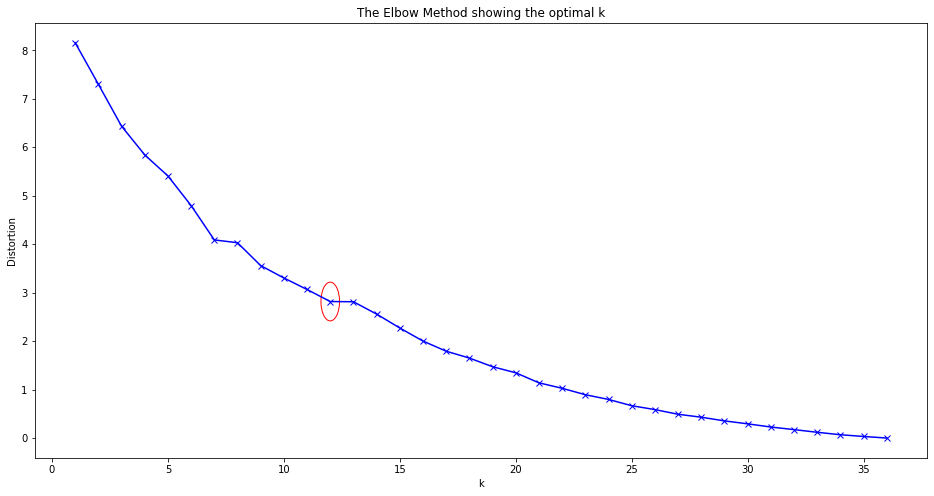

In [31]:
# Picking the correct k value
distortions = []
K = range(1,37)
onehot_grouped_clustering = onehot_grouped.drop('Place', 1)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(onehot_grouped_clustering)
    distortions.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
#distortions

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# After examining the graph, circle the best k value
circle = plt.Circle((K[11], distortions[11]), 0.4, color='r', fill=False)
plt.gcf().gca().add_artist(circle)

In [32]:
kclusters = 12
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(onehot_grouped_clustering)

In [33]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

onehot_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
onehot_merged = onehot_merged.join(neighbourhoods_venues_sorted.set_index('Place'), on='Place')

#onehot_merged # check the last columns!
onehot_merged.dropna(inplace=True)
onehot_merged.reset_index(drop=True,inplace=True)
onehot_merged

,Place,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Regensdorf,47.43400,8.46900,8.0,Restaurant,Supermarket,Shopping Mall,Asian Restaurant,Pizza Place,Sporting Goods Shop,Electronics Store,Hotel,Thai Restaurant,Train Station
1,Glattbrugg,47.43100,8.56300,8.0,Italian Restaurant,Chinese Restaurant,Train Station,Supermarket,Hotel,Mexican Restaurant,Café,Bus Stop,Kebab Restaurant,Japanese Restaurant
2,Rümlang,47.45000,8.53000,3.0,Pizza Place,Train Station,Airport Terminal,American Restaurant,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store
3,Kloten,47.45200,8.58500,8.0,Hotel,Swiss Restaurant,Restaurant,Italian Restaurant,Bus Station,Supermarket,Pizza Place,Asian Restaurant,Discount Store,Indian Restaurant
4,Bassersdorf,47.44300,8.62900,8.0,Pizza Place,Shopping Mall,Convenience Store,Cosmetics Shop,Italian Restaurant,Swiss Restaurant,Supermarket,Cupcake Shop,Deli / Bodega,Department Store
5,Wallisellen,47.41500,8.59700,7.0,Supermarket,Shopping Mall,Train Station,Wine Bar,Pool,Platform,Bakery,Italian Restaurant,Zoo Exhibit,Diner
6,Dietlikon,47.41800,8.61900,8.0,Bus Station,Hobby Shop,Sporting Goods Shop,Gas Station,Italian Restaurant,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Men's Store,Bakery
7,Dübendorf,47.39700,8.61900,8.0,Supermarket,Swiss Restaurant,Gym,Diner,Chinese Restaurant,Cable Car,Food,Italian Restaurant,Bar,Cupcake Shop
8,Schwerzenbach,47.38200,8.65700,7.0,Train Station,Food & Drink Shop,Italian Restaurant,Food,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Drugstore
9,Volketswil,47.39000,8.69100,4.0,Gym,Hotel,Swiss Restaurant,Zoo Exhibit,Flower Shop,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store


# 4. Results and Discussion <a name="results"></a>

In this section, we analyze our outputs of the clustering algorithm. According to our clustering results, we see that our ex-house (West Bridgford) is in Cluster 8. Thus, we will first create a sub-set which includes the places in cluster 8. We will see that there are 16 places which are in the same cluster with West Bridgford. These are the places that we will search for our new home, but we first want to order these places by using a recommender system. This way, we can know where to start with to search our new home.

## 4.1. Data Visualization

In this section, we visualize the cluster with a folium map.

In [34]:
# Color array to represent each cluster
colors = ['#C62828','#FF4081','#EA80FC','#18FFFF','#5C6BC0','#1976D2',
           '#29B6F6','#6200EA','#00695C','#43A047','#76FF03','#FFD600']

In [35]:
# Get the cluster value of West Bridgford
index = onehot_merged.index[onehot_merged['Place'] == 'West Bridgford'].tolist()
cluster_wb = onehot_merged['Cluster Labels'][index[0]]
print('West Bridgford Cluster:', cluster_wb)

West Bridgford Cluster: 8.0


In [41]:
# Create a folium map to show the Cluster of West Bridgford 
location_wb = [52.92979, -1.12537]
map_wb = folium.Map(location=location_wb, zoom_start = 12)

label = folium.Popup('West Bridgford Cluster ' + str(cluster_wb), parse_html=True)
# add markers to map
folium.CircleMarker(
    [float(lat), float(lon)],
    radius=5,
    popup=label,
    color=colors[int(cluster_wb) - 1],
    fill=True,
    fill_color=colors[int(cluster_wb) - 1],
    fill_opacity=0.7).add_to(map_wb) 

In [42]:
# Create a folium map to show the Clusters in Zurich
location_zurich = [47.367,8.55]
map_zurich = folium.Map(location=[47.367, 8.55], zoom_start=10)

# add markers to the map
for lat, lon, poi, cluster in zip(onehot_merged['Latitude'], onehot_merged['Longitude'], onehot_merged['Place'], onehot_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=colors[int(cluster) - 1],
        fill=True,
        fill_color=colors[int(cluster) - 1],
        fill_opacity=0.7).add_to(map_zurich)

In [44]:
# display maps with place markers (West Bridgford on the left and Zurich on the right)

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_wb.get_root().render().replace('"', '&quot;'),500,500,
                   map_zurich.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

In [45]:
# Display the dataframe for cluster 8
clusterWB = onehot_merged.loc[onehot_merged['Cluster Labels'] == cluster_wb, onehot_merged.columns[[0] + list(range(4, onehot_merged.shape[1]))]]
clusterWB

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Regensdorf,Restaurant,Supermarket,Shopping Mall,Asian Restaurant,Pizza Place,Sporting Goods Shop,Electronics Store,Hotel,Thai Restaurant,Train Station
1,Glattbrugg,Italian Restaurant,Chinese Restaurant,Train Station,Supermarket,Hotel,Mexican Restaurant,Café,Bus Stop,Kebab Restaurant,Japanese Restaurant
3,Kloten,Hotel,Swiss Restaurant,Restaurant,Italian Restaurant,Bus Station,Supermarket,Pizza Place,Asian Restaurant,Discount Store,Indian Restaurant
4,Bassersdorf,Pizza Place,Shopping Mall,Convenience Store,Cosmetics Shop,Italian Restaurant,Swiss Restaurant,Supermarket,Cupcake Shop,Deli / Bodega,Department Store
6,Dietlikon,Bus Station,Hobby Shop,Sporting Goods Shop,Gas Station,Italian Restaurant,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Men's Store,Bakery
7,Dübendorf,Supermarket,Swiss Restaurant,Gym,Diner,Chinese Restaurant,Cable Car,Food,Italian Restaurant,Bar,Cupcake Shop
10,Urdorf,Grocery Store,Zoo Exhibit,Italian Restaurant,Swiss Restaurant,Post Office,Kebab Restaurant,Bus Stop,Fast Food Restaurant,Cupcake Shop,Deli / Bodega
12,Dietikon,Supermarket,Swiss Restaurant,Fast Food Restaurant,Bus Stop,Drugstore,Playground,Bakery,Italian Restaurant,Steakhouse,Burrito Place
18,Langnau am Albis,Swiss Restaurant,Tennis Stadium,Flower Shop,Bakery,Indian Restaurant,Supermarket,Light Rail Station,Office,Train Station,Gas Station
19,Opfikon,Swiss Restaurant,Grocery Store,Pool,Bus Station,Zoo Exhibit,Fast Food Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Diner


## 4.2. Recommender System

In this section, we use a content-based filtering method to generate a recommendation list. We first display the venues in West Bridgford. Then, we manually give ratings to the venues that we know in our old neighborhood. We calculate the average rating for each venue category in West Bridgford. Finally, using these ratings, we generate a recommendation list of similar places in Zurich Canton.

In [46]:
#Retrieve the venues and venue categories of West Bridgford
wb_indices = venues.index[venues['Place']=='West Bridgford'].tolist()
wb_venues = venues[['Venue', 'Venue Category']].iloc[wb_indices].reset_index(drop=True)
wb_venues

,Venue,Venue Category
0,Yumacha,Asian Restaurant
1,M&S Foodhall,Grocery Store
2,Escabeche,Tapas Restaurant
3,Côte Brasserie,French Restaurant
4,Copper,Wine Bar
5,Taste,Breakfast Spot
6,Portello Lounge,Lounge
7,Philos,Café
8,Gusto,Italian Restaurant
9,Tiffin,Tea Room


In [47]:
# Give ratings manually for all venues in West Bridgford
userInput = {'Venue':wb_venues['Venue'],
            'Venue Category':wb_venues['Venue Category'],
            'Rating':[9,9,9,7,np.nan,5,np.nan,np.nan,9,7,10,10,8,8,10,np.nan,np.nan,10,0,10,10,10,8,8,np.nan,np.nan,10]}
userInput = pd.DataFrame(userInput)
userInput

,Venue,Venue Category,Rating
0,Yumacha,Asian Restaurant,9.0
1,M&S Foodhall,Grocery Store,9.0
2,Escabeche,Tapas Restaurant,9.0
3,Côte Brasserie,French Restaurant,7.0
4,Copper,Wine Bar,NaN
5,Taste,Breakfast Spot,5.0
6,Portello Lounge,Lounge,NaN
7,Philos,Café,NaN
8,Gusto,Italian Restaurant,9.0
9,Tiffin,Tea Room,7.0


In [48]:
# Calculate th average rating value for each Venue Category
userInput = userInput.groupby('Venue Category').mean().reset_index()
userInput

,Venue Category,Rating
0,Asian Restaurant,9.000000
1,Breakfast Spot,5.000000
2,Café,NaN
3,Cocktail Bar,10.000000
4,Coffee Shop,10.000000
5,Deli / Bodega,8.000000
6,Fast Food Restaurant,8.000000
7,French Restaurant,7.000000
8,Grocery Store,6.333333
9,Health Food Store,8.000000


In [49]:
# Save user ratings as a Series
inputVenues_wb = pd.Series(np.array(userInput['Rating']), index = userInput['Venue Category'])
inputVenues_wb

Venue Category
Asian Restaurant         9.000000
Breakfast Spot           5.000000
Café                          NaN
Cocktail Bar            10.000000
Coffee Shop             10.000000
Deli / Bodega            8.000000
Fast Food Restaurant     8.000000
French Restaurant        7.000000
Grocery Store            6.333333
Health Food Store        8.000000
Italian Restaurant       9.000000
Lounge                        NaN
Music Venue                   NaN
Optical Shop             8.000000
Park                    10.000000
Pharmacy                10.000000
Pizza Place             10.000000
Pub                           NaN
Tapas Restaurant         9.000000
Tea Room                 7.000000
Wine Bar                      NaN
dtype: float64

In [50]:
# Generate a Series object for all input venues with a NA rating
inputVenues = pd.Series(np.nan, index = venues['Venue Category'].unique())

# Replace the rated ones with the values from inputVenues_wb data
for i in range(len(inputVenues_wb)):
    category = inputVenues_wb.index[i]
    inputVenues[category] = inputVenues_wb[category]
inputVenues.shape

(94,)

In [51]:
# Retrieve the rows from onehot_group dataframe only for the places in Cluster 8
onehot_grouped_cl8 = onehot_grouped.loc[onehot_grouped['Place'].isin(clusterWB['Place'])]
onehot_grouped_cl8

,Place,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,...,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theme Restaurant,Train Station,Tram Station,Wine Bar,Zoo Exhibit
1,Bassersdorf,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4,Birmensdorf ZH,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
6,Brüttisellen,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.125000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
7,Dietikon,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
8,Dietlikon,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.071429,0.000000,0.000000,0.000
10,Dübendorf,0.0,0.0,0.000000,0.066667,0.000000,0.0,0.0,0.0,0.0,...,0.133333,0.000000,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000
12,Fällanden,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
13,Gattikon,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
14,Glattbrugg,0.0,0.0,0.045455,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.045455,0.000000,0.000000,0.0,0.045455,0.045455,0.090909,0.045455,0.000000,0.000
17,Kloten,0.0,0.0,0.000000,0.000000,0.032258,0.0,0.0,0.0,0.0,...,0.096774,0.000000,0.000000,0.0,0.032258,0.000000,0.032258,0.000000,0.000000,0.000


In [52]:
# Remove last row (West Bridgford) from the frame
onehot_grouped_cl8 = onehot_grouped_cl8[:-1].set_index('Place')
onehot_grouped_cl8

,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,...,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theme Restaurant,Train Station,Tram Station,Wine Bar,Zoo Exhibit
Place,,,,,,,,,,,,,,,,,,,,,
Bassersdorf,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000
Birmensdorf ZH,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.166667,...,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000
Brüttisellen,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.125000,...,0.125000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000
Dietikon,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.066667,...,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000
Dietlikon,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.071429,0.000000,0.0,0.000
Dübendorf,0.0,0.0,0.000000,0.066667,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.133333,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.000
Fällanden,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000
Gattikon,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.200000,...,0.200000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000
Glattbrugg,0.0,0.0,0.045455,0.000000,0.000000,0.0,0.0,0.0,0.0,0.045455,...,0.045455,0.0,0.0,0.0,0.045455,0.045455,0.090909,0.045455,0.0,0.000


In [53]:
# Multiplying onehot_grouped_cl8 by the weights and then take the weighted average to generate a recommendation list
recommendationTable = ((onehot_grouped_cl8*inputVenues).sum(axis=1))/(inputVenues.sum())
recommendationTable.sort_values(ascending=False, inplace=True)
recommendationTable

Place
Bassersdorf         0.020206
Urdorf              0.020161
Dietikon            0.013400
Kloten              0.012807
Dietlikon           0.012407
Birmensdorf ZH      0.012407
Regensdorf          0.010103
Opfikon             0.009429
Glattbrugg          0.009136
Brüttisellen        0.008375
Fällanden           0.005238
Dübendorf           0.004467
Tagelswangen        0.000000
Nürensdorf          0.000000
Langnau am Albis    0.000000
Gattikon            0.000000
dtype: float64

In [54]:
# Create a dataframe with all the recommendations which have a rating greater than 0
final_list = recommendationTable[recommendationTable>0]
final_list = final_list.to_frame().reset_index()
final_list.rename(columns={0:'Rating'}, inplace=True)
final_list

,Place,Rating
0,Bassersdorf,0.020206
1,Urdorf,0.020161
2,Dietikon,0.013400
3,Kloten,0.012807
4,Dietlikon,0.012407
5,Birmensdorf ZH,0.012407
6,Regensdorf,0.010103
7,Opfikon,0.009429
8,Glattbrugg,0.009136
9,Brüttisellen,0.008375


In [55]:
# Retrieve the rows from onehot_merged which are also listed in out final list
onehot_merged_top = onehot_merged.merge(final_list, on='Place')
# Sort rows according to Ratings column (last column)
onehot_merged_top.sort_values('Rating',ascending=False,inplace=True)
onehot_merged_top.reset_index(drop=True,inplace=True)
onehot_merged_top

,Place,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Rating
0,Bassersdorf,47.443,8.629,8.0,Pizza Place,Shopping Mall,Convenience Store,Cosmetics Shop,Italian Restaurant,Swiss Restaurant,Supermarket,Cupcake Shop,Deli / Bodega,Department Store,0.020206
1,Urdorf,47.385,8.426,8.0,Grocery Store,Zoo Exhibit,Italian Restaurant,Swiss Restaurant,Post Office,Kebab Restaurant,Bus Stop,Fast Food Restaurant,Cupcake Shop,Deli / Bodega,0.020161
2,Dietikon,47.402,8.400,8.0,Supermarket,Swiss Restaurant,Fast Food Restaurant,Bus Stop,Drugstore,Playground,Bakery,Italian Restaurant,Steakhouse,Burrito Place,0.013400
3,Kloten,47.452,8.585,8.0,Hotel,Swiss Restaurant,Restaurant,Italian Restaurant,Bus Station,Supermarket,Pizza Place,Asian Restaurant,Discount Store,Indian Restaurant,0.012807
4,Dietlikon,47.418,8.619,8.0,Bus Station,Hobby Shop,Sporting Goods Shop,Gas Station,Italian Restaurant,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Men's Store,Bakery,0.012407
5,Birmensdorf ZH,47.355,8.443,8.0,Pizza Place,Swiss Restaurant,Diner,Bus Station,Bakery,Food & Drink Shop,Garden Center,Electronics Store,Cupcake Shop,Deli / Bodega,0.012407
6,Regensdorf,47.434,8.469,8.0,Restaurant,Supermarket,Shopping Mall,Asian Restaurant,Pizza Place,Sporting Goods Shop,Electronics Store,Hotel,Thai Restaurant,Train Station,0.010103
7,Opfikon,47.432,8.576,8.0,Swiss Restaurant,Grocery Store,Pool,Bus Station,Zoo Exhibit,Fast Food Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Diner,0.009429
8,Glattbrugg,47.431,8.563,8.0,Italian Restaurant,Chinese Restaurant,Train Station,Supermarket,Hotel,Mexican Restaurant,Café,Bus Stop,Kebab Restaurant,Japanese Restaurant,0.009136
9,Brüttisellen,47.422,8.633,8.0,IT Services,Discount Store,Italian Restaurant,Swiss Restaurant,Bakery,Bus Station,Cosmetics Shop,Shopping Mall,Zoo Exhibit,Flower Shop,0.008375


In [57]:
# Create a folium map to show the places recommended in Cluster 8
location_zurich = [47.367,8.55]
map_zurich = folium.Map(location=[47.367, 8.55], zoom_start=10)
# add markers to the map
for lat, lon, poi, ranking in zip(onehot_merged_top['Latitude'], onehot_merged_top['Longitude'], onehot_merged_top['Place'], onehot_merged_top.index):
    label = folium.Popup(str(poi) + ' Ranking: ' + str(ranking+1), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=colors[int(cluster) - 1],
        fill=True,
        fill_color=colors[int(cluster) - 1],
        fill_opacity=0.7).add_to(map_zurich)
map_zurich

# 5. Conclusion <a name="conclusion"></a>

We started this project to find our new home. We have lived in West Bridgford, Nottingham, UK for 3 years and we loved to live there. When we decided to move to Zurich for work-related reasons, we decided to analyze all neighborhoods to to find the most similar ones to West Bridgford.

When we started our journey from UK to Switzerland, we knew that Zurich is an expensive city. So our first step was learning the rent prices in all Canton Zurich. We wanted to rent a relatively cheap apartment than an average apartment in the city center but we also wanted to live as close as possible to the city center. And, last but not least, we wanted to find a similar neighborhood to West Bridgford.

In this project, we used 3 different dataset: average house renting prices, latitude and longitudes of places and finally the venues in the places. We first used average house renting prices and latitude-longitudes of places to eliminate some of our candidates. At the beginning, we had 172 places in Canton Zurich. But we decreased this number to 51 by eliminating the ones which have longer distance than 12 km to Zurich city center, since our area of interest was 12x12 km around Zurich city center. Then, we decreased this number to 37 by eliminating the ones which costs more than CHF 2,000 per month, since this was the maximum amount of rent that we can pay. Finally, using the latitude-longitude values, we collected the data of nearby venues using **<a href='https://developer.foursquare.com/'>Foursquare API</a>** [4]. 

We used a clustering algorithm in order to find one cluster which have the similar places with West Bridgford. In order to decide on similarity/dissimilarity, we looked at the venues in the places. With finding our cluster, we decreased our candidate places to 16. This number was showing that we still need to search houses from 16 different neighborhoods. So we decided to find a place to start with and use a content-based filtering algorithm in order to rank our candidates. In this manner, we first gave ratings to the venues that we know and like or dislike in West Bridgford. Then, we used these ratings to create a recommendation list.

At the end, we had an ordered list so we started to search our new home. After viewing some apartments from the places in our list, we found our new apartment in Dietikon, which was the $3^{rd}$ place in our recommendation list. This is a nice neighborhood near a stunning river, it is not as expensive as the city center, but it is only 17 minutes away from the city center by train.

# 6. References <a name="references"></a>

[1] **<a href='mobilityexchange.mercer.com/Insights/quality-of-living-rankings'>Mercer</a>**<br>
[2] **<a href='https://www.geonames.org/postal-codes/CH/ZH/zurich.html'>Zurich - postal codes<a/>**<br>
[3] **<a href='https://www.immomapper.ch/en/real-estate-market/'>Real Estate Market</a>**<br>
[4] **<a href='https://developer.foursquare.com/'>Foursquare API</a>**